In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Set global parameters for plotting.
plt.rc('figure', figsize=(12, 6))
sns.set(font_scale=1.2)
avocado_df = pd.read_csv('avocado2020.csv', 
                         parse_dates=['date'],
                         index_col=['date'])
avocado_df

,average_price,total_volume,4046,4225,4770,total_bags,small_bags,large_bags,xlarge_bags,type,year,geography
date,,,,,,,,,,,,
2015-01-04,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.00,conventional,2015,Albany
2015-01-04,1.79,1373.95,57.42,153.88,0.00,1162.65,1162.65,0.00,0.00,organic,2015,Albany
2015-01-04,1.00,435021.49,364302.39,23821.16,82.15,46815.79,16707.15,30108.64,0.00,conventional,2015,Atlanta
2015-01-04,1.76,3846.69,1500.15,938.35,0.00,1408.19,1071.35,336.84,0.00,organic,2015,Atlanta
2015-01-04,1.08,788025.06,53987.31,552906.04,39995.03,141136.68,137146.07,3990.61,0.00,conventional,2015,Baltimore/Washington
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-11-29,1.47,1583056.27,67544.48,97996.46,2617.17,1414878.10,906711.52,480191.83,27974.75,organic,2020,Total U.S.
2020-11-29,0.91,5811114.22,1352877.53,589061.83,19741.90,3790665.29,2197611.02,1531530.14,61524.13,conventional,2020,West
2020-11-29,1.48,289961.27,13273.75,19341.09,636.51,256709.92,122606.21,134103.71,0.00,organic,2020,West


In [2]:
columns_considered = ['average_price', 'type', 'geography']
avocado_df = avocado_df[columns_considered]
avocado_df.head()

,average_price,type,geography
date,,,
2015-01-04,1.22,conventional,Albany
2015-01-04,1.79,organic,Albany
2015-01-04,1.00,conventional,Atlanta
2015-01-04,1.76,organic,Atlanta
2015-01-04,1.08,conventional,Baltimore/Washington


In [3]:
print('Number of entries for various cities and regions:')
print()

for geographical_name in avocado_df.geography.unique():
    num_entries = sum(avocado_df.geography == geographical_name)
    print(f'{geographical_name:25} {num_entries}')

Number of entries for various cities and regions:

Albany                    612
Atlanta                   612
Baltimore/Washington      612
Boise                     612
Boston                    612
Buffalo/Rochester         612
California                612
Charlotte                 612
Chicago                   612
Cincinnati/Dayton         612
Columbus                  612
Dallas/Ft. Worth          612
Denver                    612
Detroit                   612
Grand Rapids              612
Great Lakes               612
Harrisburg/Scranton       612
Hartford/Springfield      612
Houston                   612
Indianapolis              612
Jacksonville              612
Las Vegas                 612
Los Angeles               612
Louisville                612
Miami/Ft. Lauderdale      612
Midsouth                  612
Nashville                 612
New Orleans/Mobile        612
New York                  612
Northeast                 612
Northern New England      612
Orlando            

C:\Users\HP\AppData\Local\Temp\ipykernel_36352\1958057267.py:3: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(sub_df.index, sub_df.average_price, cmap='plasma')


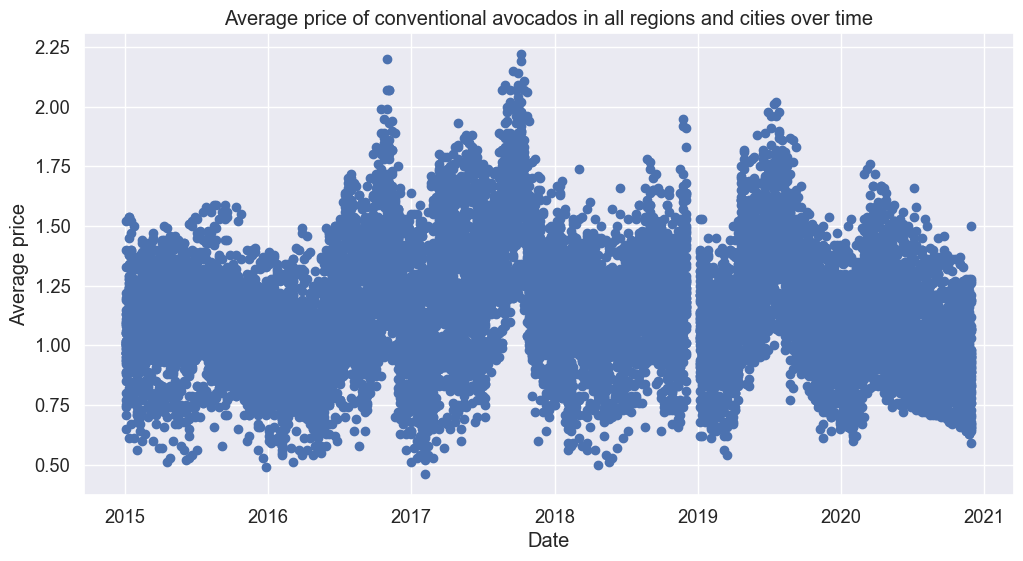

In [4]:
sub_df = avocado_df.query("type == 'conventional'")

plt.scatter(sub_df.index, sub_df.average_price, cmap='plasma')
plt.title('Average price of conventional avocados in all regions and ' \
          'cities over time')

plt.xlabel('Date')
plt.ylabel('Average price')
# Define the path for saving the file in the Downloads folder
downloads_path = os.path.join(os.path.expanduser("~"), "Downloads", "ar_plot.png")
# Save the plot as a PNG
plt.savefig(downloads_path, format="png")
plt.show()

In [5]:
def plot_rolling_stats(time_series, window, avocado_type, geography):
    # A helper function for plotting the given time series, its rolling mean and standard deviation.

    rolling_mean = time_series.rolling(window=window).mean()
    rolling_std = time_series.rolling(window=window).std()

    index = time_series.index

    sns.lineplot(x=index, y=time_series.average_price,
                 label='data', color='cornflowerblue')
    sns.lineplot(x=index, y=rolling_mean.average_price,
                 label='rolling mean', color='orange')
    
    sns.lineplot(x=index, y=rolling_std.average_price,
                 label='rolling std', color='seagreen')
    
    plt.title(f'Average price of {avocado_type} avocados in {geography}')
    plt.xlabel('Date')
    plt.ylabel('Average price') 
    # Define the path for saving the file in the Downloads folder
    downloads_path = os.path.join(os.path.expanduser("~"), "Downloads", "ar_plot_mean.png")

    # Save the plot as a PNG
    plt.savefig(downloads_path, format="png")

In [6]:
# NB: these two variables affect all the following calculations in that kernel.
AVOCADO_TYPE = 'conventional'
GEOGRAPHY = 'Total U.S.'

sub_df = avocado_df.query(f"type == '{AVOCADO_TYPE}' and " \
                          f"geography == '{GEOGRAPHY}'")
                          
sub_df.drop(['type', 'geography'], axis=1, inplace=True)
sub_df

C:\Users\HP\AppData\Local\Temp\ipykernel_36352\1678133344.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_df.drop(['type', 'geography'], axis=1, inplace=True)


,average_price
date,
2015-01-04,0.95
2015-01-11,1.01
2015-01-18,1.03
2015-01-25,1.04
2015-02-01,0.89
...,...
2020-11-01,0.92
2020-11-08,0.90
2020-11-15,0.91


C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

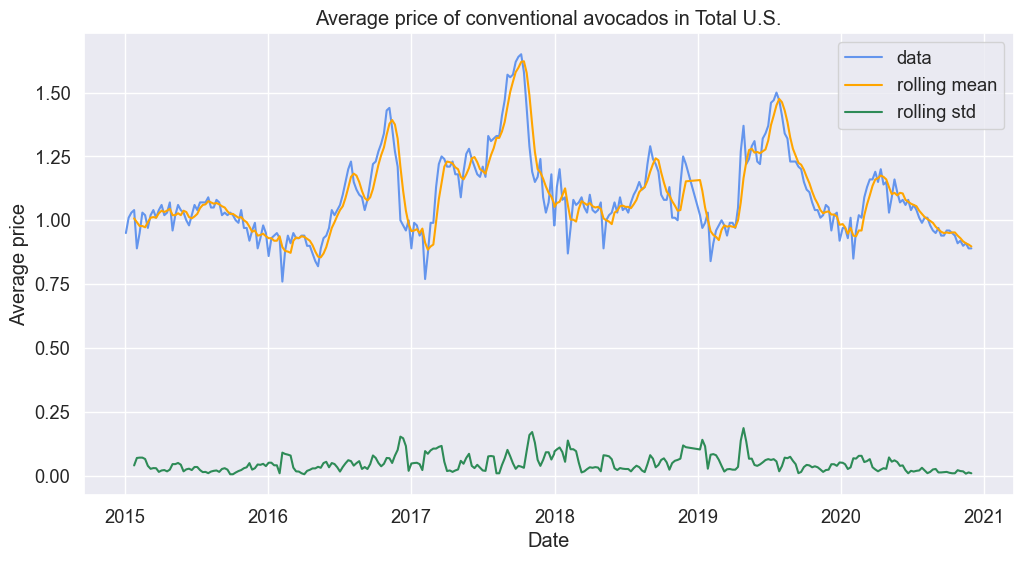

In [7]:
plot_rolling_stats(sub_df, window=4, avocado_type=AVOCADO_TYPE, geography=GEOGRAPHY)

In [8]:
TEST_SET_SIZE = 45  # number of weeks left for the test set

data = sub_df.values
train_set, test_set = data[:-TEST_SET_SIZE], data[-TEST_SET_SIZE:]

print('shapes:', data.shape, train_set.shape, test_set.shape)

shapes: (306, 1) (261, 1) (45, 1)


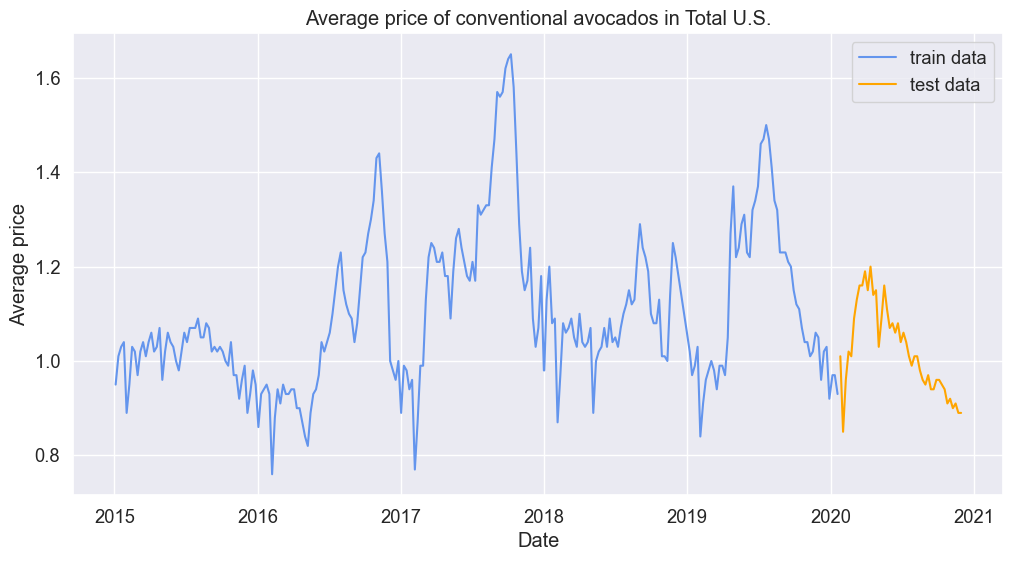

In [9]:
train_set_size = len(data) - TEST_SET_SIZE
train_set_dates = sub_df.head(train_set_size).index  # for plotting
test_set_dates = sub_df.tail(TEST_SET_SIZE).index  

plt.plot(train_set_dates, train_set, color='cornflowerblue', label='train data')
plt.plot(test_set_dates, test_set, color='orange', label='test data')
plt.legend(loc='best')
plt.title(f'Average price of {AVOCADO_TYPE} avocados in {GEOGRAPHY}')
plt.xlabel('Date')
plt.ylabel('Average price')
plt.show()

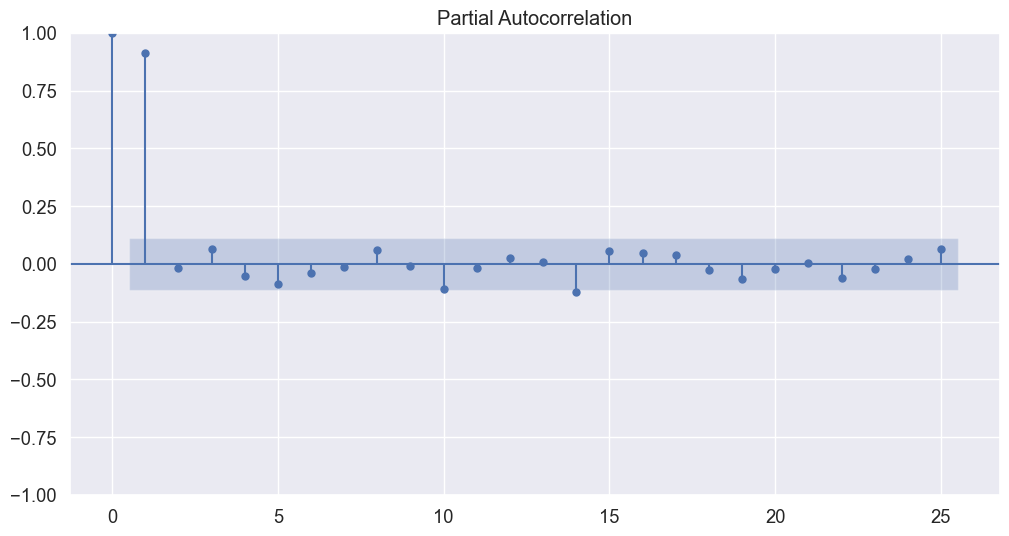

In [10]:
from statsmodels.graphics.tsaplots import plot_pacf
data = sub_df
plot_pacf(data['average_price'])
# Define the path for saving the file in the Downloads folder
downloads_path = os.path.join(os.path.expanduser("~"), "Downloads", "pacf_plot.png")
# Save the plot as a PNG
plt.savefig(downloads_path, format="png")
plt.show()

In [14]:
from statsmodels.tsa.ar_model import AutoReg

model = AutoReg(train_set, lags=2)  # only the first 10 acf values are significant 
trained_model = model.fit()
print('Coefficients: %s' % trained_model.params)

Coefficients: [ 0.09379319  0.97118669 -0.05659111]


In [15]:
from sklearn.metrics import mean_squared_error as mse

predictions = trained_model.predict(start=train_set_size, 
                                    end=train_set_size + TEST_SET_SIZE - 1)

error = mse(test_set, predictions)

print(f'test MSE: {error:.3}')
print(f'test RMSE: {error ** 0.5:.3}')

test MSE: 0.0136
test RMSE: 0.117


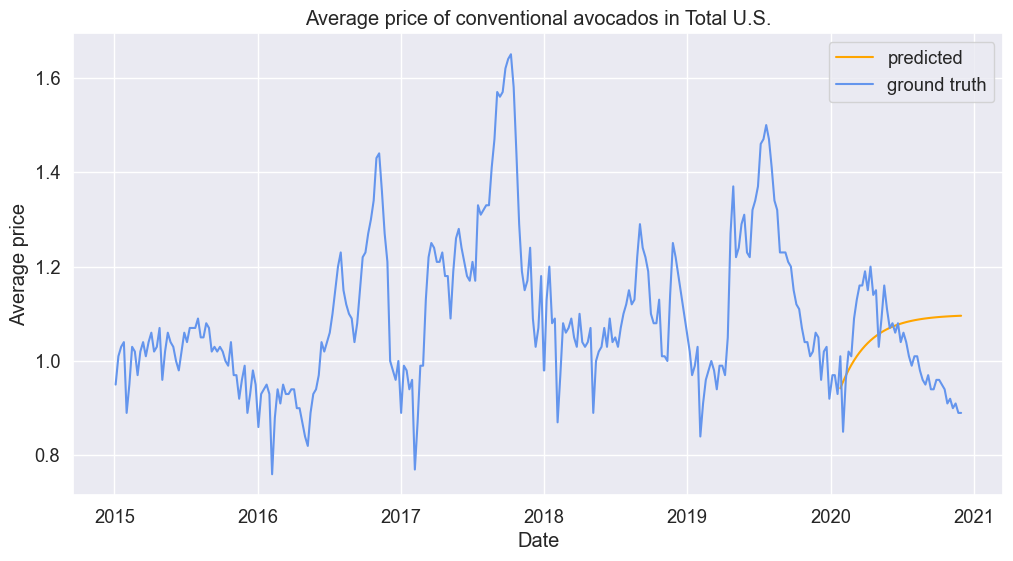

In [16]:
plt.plot(test_set_dates, predictions, color='orange', label='predicted')
plt.plot(sub_df.index, sub_df.average_price, color='cornflowerblue', label='ground truth')
plt.legend(loc='best')
plt.title(f'Average price of {AVOCADO_TYPE} avocados in {GEOGRAPHY}')
plt.xlabel('Date')
plt.ylabel('Average price')
# Define the path for saving the file in the Downloads folder
downloads_path = os.path.join(os.path.expanduser("~"), "Downloads", "ar_plot_forecast.png")

# Save the plot as a PNG
plt.savefig(downloads_path, format="png")
plt.show()